In [17]:
import os

# Disable oneDNN / MKL (FIXES Windows CPU crash)
os.environ["FLAGS_use_mkldnn"] = "0"
os.environ["PADDLE_LOG_LEVEL"] = "ERROR"


In [18]:

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
#Load images and collect metadata
DATA_DIR = "../data/raw/explore"   #explore set only

image_data = []

for img_name in os.listdir(DATA_DIR):
    if img_name.lower().endswith(".png"):
        img_path = os.path.join(DATA_DIR, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        h, w = img.shape[:2]
        channels = img.shape[2] if len(img.shape) == 3 else 1

        image_data.append({
            "image_name": img_name,
            "width": w,
            "height": h,
            "channels": channels,
            "orientation": "portrait" if h > w else "landscape",
            "is_grayscale": channels == 1
        })

df = pd.DataFrame(image_data)
df.head()


,image_name,width,height,channels,orientation,is_grayscale
0,172427893_3_pg11.png,1200,1678,3,portrait,False
1,172448470_3_pg15.png,1230,1396,3,portrait,False
2,172561841_pg1.png,1188,1704,3,portrait,False
3,172566189_1_pg10.png,1246,1496,3,portrait,False
4,172571502_1_pg21.png,1228,1470,3,portrait,False


In [20]:
df.describe()


,width,height,channels
count,50.000000,50.000000,50.0
mean,1181.760000,1516.220000,3.0
std,69.174007,136.747688,0.0
min,924.000000,1154.000000,3.0
25%,1172.000000,1435.250000,3.0
50%,1203.000000,1502.000000,3.0
75%,1213.500000,1673.000000,3.0
max,1298.000000,1704.000000,3.0


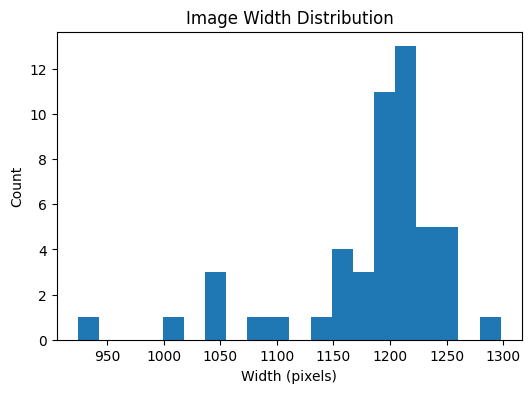

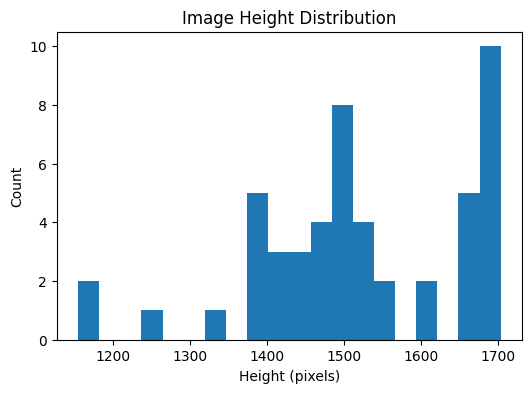

In [21]:
#Image resolution distribution

plt.figure(figsize=(6,4))
plt.hist(df["width"], bins=20)
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["height"], bins=20)
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.show()


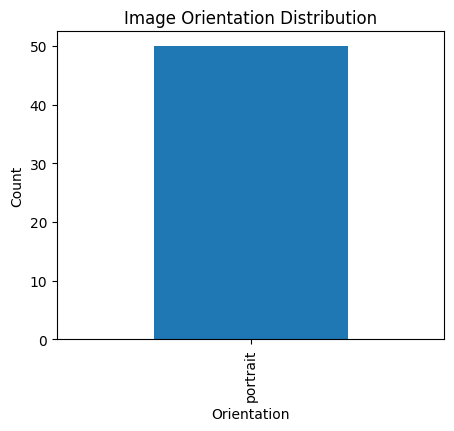

In [22]:
#Orientation analysis

orientation_counts = df["orientation"].value_counts()

plt.figure(figsize=(5,4))
orientation_counts.plot(kind="bar")
plt.title("Image Orientation Distribution")
plt.xlabel("Orientation")
plt.ylabel("Count")
plt.show()


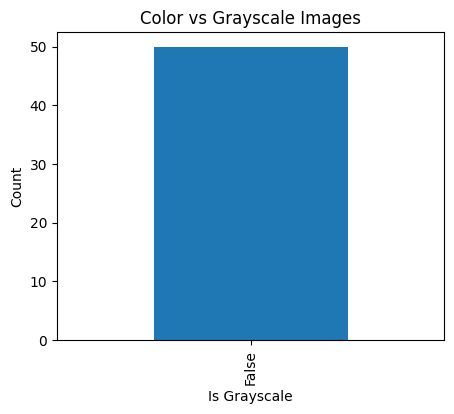

In [23]:
#Color vs Grayscale analysis

color_counts = df["is_grayscale"].value_counts()

plt.figure(figsize=(5,4))
color_counts.plot(kind="bar")
plt.title("Color vs Grayscale Images")
plt.xlabel("Is Grayscale")
plt.ylabel("Count")
plt.show()


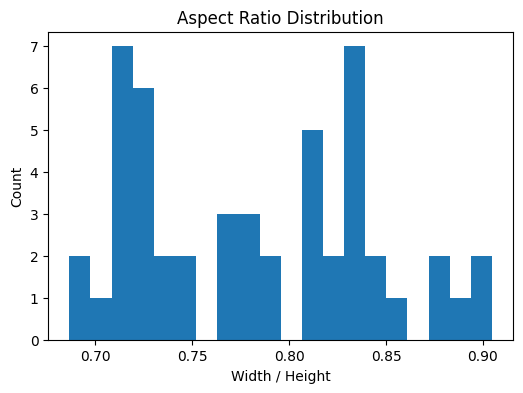

In [24]:
#Aspect ratio distribution

df["aspect_ratio"] = df["width"] / df["height"]

plt.figure(figsize=(6,4))
plt.hist(df["aspect_ratio"], bins=20)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Count")
plt.show()


### Alignment with System Design

Based on the observed variability in image resolution, orientation, and aspect ratios,
we avoid template-based or fixed-layout assumptions.

These observations motivate:
- Layout-aware key–value extraction
- Orientation-agnostic processing
- Resolution-normalized OCR preprocessing




### EDA Summary

EDA reveals high heterogeneity in invoice image properties.
Therefore, robustness and explainability are prioritized over rigid modeling assumptions.
These insights directly guide preprocessing, OCR selection, and layout logic design.
